# HW4 - Car Price Prediction with Decision Tree Regressor

Aim: _This project predicts car sale prices using decision tree regression. Includes preprocessing, handling missing values, normalization, and evaluation._

## Step 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

## Step 2. Uploading data

In [2]:
file_path = "data/car_data.csv"  # Make sure this file is placed in the data/ folder

data = pd.read_csv(file_path)
print("Initial data shape:", data.shape)
print(data.head())

Initial data shape: (23906, 16)
         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft    

## Step 3. Check for missing values

In [3]:
print("\nMissing values:")
print(data.isna().sum())


Missing values:
Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


## Step 4. Fill missing numeric values with column mean

In [4]:
numerical_data = data.select_dtypes(include=[np.number])
data[numerical_data.columns] = numerical_data.fillna(numerical_data.mean())

## Step 5. Drop uninformative columns

In [5]:
columns_to_drop = ['Car_id', 'Date', 'Customer Name', 'Phone', 'Dealer_Name']
data = data.drop(columns=columns_to_drop, axis=1)

## Step 6. One-hot encode categorical variables

In [17]:
X = data.drop('Price ($)', axis=1)
X = pd.get_dummies(X, drop_first=True)

print(X.head())
print(X.dtypes)
print(X.iloc[:, :10].head())  # перші 10 колонок
print(f"Total columns: {X.shape[1]}")


   Annual Income  Gender_Male  Company_Audi  Company_BMW  Company_Buick  \
0          13500         True         False        False          False   
1        1480000         True         False        False          False   
2        1035000         True         False        False          False   
3          13500         True         False        False          False   
4        1465000         True         False        False          False   

   Company_Cadillac  Company_Chevrolet  Company_Chrysler  Company_Dodge  \
0             False              False             False          False   
1             False              False             False           True   
2              True              False             False          False   
3             False              False             False          False   
4             False              False             False          False   

   Company_Ford  ...  Body Style_Hatchback  Body Style_Passenger  \
0          True  ...          

## Step 7. Define target variable

In [7]:
y = data['Price ($)']

## Step 8. Split dataset (train 70%, val 15%, test 15%)

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {X_train.shape}, Validation size: {X_val.shape}, Test size: {X_test.shape}")


Train size: (16734, 204), Validation size: (3586, 204), Test size: (3586, 204)


## Step 9. (Optional) Standardize features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Step 10. Train model

In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Step 11. Predict and evaluate

In [12]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR^2: {r2:.2f}")


Model Evaluation:
MAE: 4518.19
MSE: 113733674.45
R^2: 0.44


## Step 12. Plot the decision tree

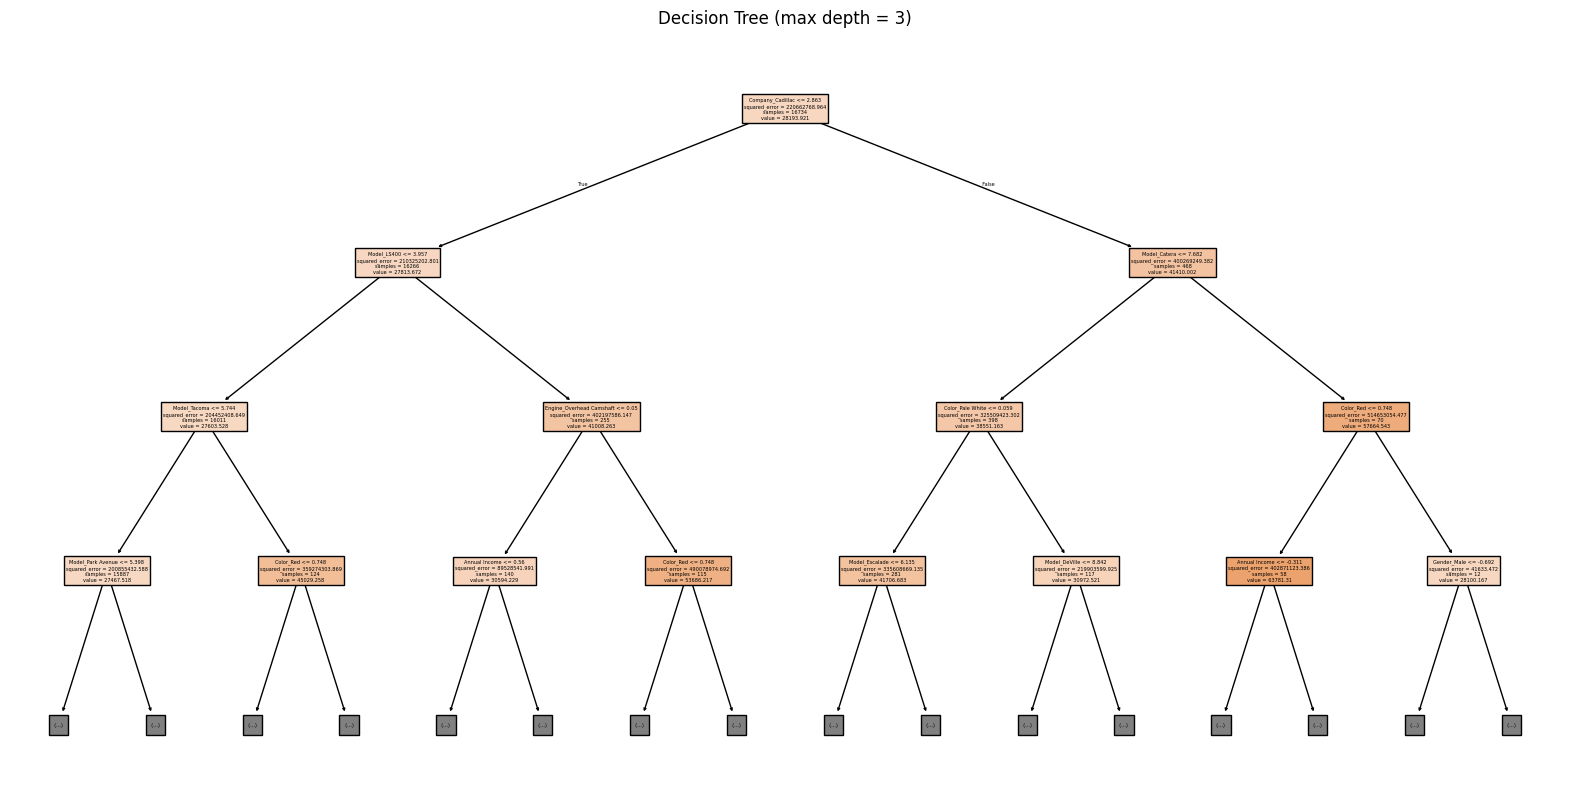

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=3)
plt.title("Decision Tree (max depth = 3)")
plt.show()

## Step 13. Optional: PCA visualization

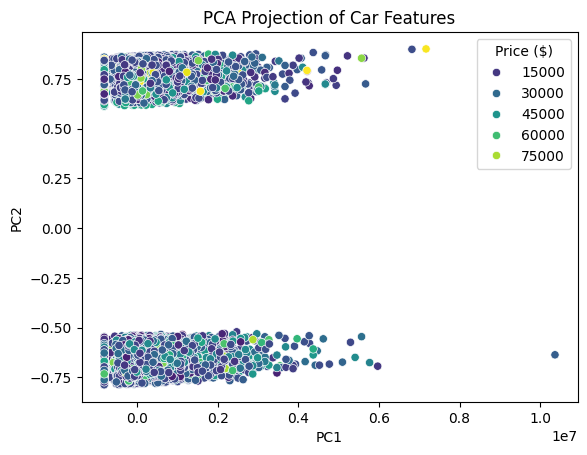

In [14]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis')
plt.title("PCA Projection of Car Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Conclusion

The decision tree model achieved a Mean Absolute Error (MAE) of **4518.19** and an R² score of **0.44** on the test set. This indicates that the model captures some patterns in the data but still leaves substantial room for improvement.

Possible next steps include:
- tuning model hyperparameters (e.g., `max_depth`, `min_samples_split`),
- testing ensemble methods like Random Forest or Gradient Boosting,
- performing more advanced feature engineering, especially for categorical variables.